<h1 align="center"> Predicting Count of Bike Rentals </h1>
<h3 align="center"> Machine Learning Project </h3>
<h3 align="center"> Wedam Nyaaba, April 2017 </h3>

# 1. Data

In [1]:
# Import modules
import pandas as pd
from patsy import dmatrices
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn import neural_network
import tensorflow as tf
from six.moves import range

# Enable inline plotting in notebook
%matplotlib inline

In [3]:
# Read in data
dat = pd.read_csv("DC_Bike_Rentals.csv")
dat.head()

,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,0,1,0,0,1,9.84,14.395,81,0.0,16
1,1,1,0,0,1,9.02,13.635,80,0.0,40
2,2,1,0,0,1,9.02,13.635,80,0.0,32
3,3,1,0,0,1,9.84,14.395,75,0.0,13
4,4,1,0,0,1,9.84,14.395,75,0.0,1


In [4]:
# Show data types again
dat.dtypes

hour            int64
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

In [5]:
# Transform hour, season, weather as strings
dat.hour = dat.hour.astype('str')
dat.season = dat.season.astype('str')
dat.weather = dat.weather.astype('str')

# Show data types again
dat.dtypes

hour           object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

In [6]:
# Get the descriptive summary
dat.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,191.574132
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,181.144454
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,977.000000


## 2. Data Preparation

### 2.1. Create Design Matrices

In [7]:
# Create design matrices; "0" in the formula means no intercept term and all dummies
y, X = dmatrices('count ~ 0 + hour + season + holiday + weather + temp + atemp + humidity + windspeed',
                 data=dat,
                 return_type='dataframe')

In [8]:
y.head()

,count
0,16.0
1,40.0
2,32.0
3,13.0
4,1.0


In [9]:
X.head()

,hour[0],hour[1],hour[10],hour[11],hour[12],hour[13],hour[14],hour[15],hour[16],hour[17],...,season[T.3],season[T.4],weather[T.2],weather[T.3],weather[T.4],holiday,temp,atemp,humidity,windspeed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.84,14.395,81.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.02,13.635,80.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.02,13.635,80.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.84,14.395,75.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.84,14.395,75.0,0.0


In [10]:
type(X)

pandas.core.frame.DataFrame

### 2.2. Data Preprocessing

It's usually recommended to normalize data before applying the neural network model. We normalize the predictor variables to the range of [0, 1]. We can use the sklearn.preprocessing module to normalize variables.

In [11]:
X_scale = preprocessing.MinMaxScaler().fit_transform(X)
y_scale = preprocessing.MinMaxScaler().fit_transform(y)

In [12]:
# Show the type of X_scale
type(X_scale)

numpy.ndarray

In [13]:
X_scale = pd.DataFrame(X_scale,columns=X.columns)
y_scale = pd.DataFrame(y_scale,columns=y.columns)

In [14]:
# Show the type of X_scale
type(X_scale)

pandas.core.frame.DataFrame

In [15]:
X_scale.describe()

,hour[0],hour[1],hour[10],hour[11],hour[12],hour[13],hour[14],hour[15],hour[16],hour[17],...,season[T.3],season[T.4],weather[T.2],weather[T.3],weather[T.4],holiday,temp,atemp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.041797,0.041705,0.041797,0.041797,0.041889,0.041889,0.041889,0.041889,0.041889,0.041889,...,0.251056,0.251148,0.260334,0.078909,0.000092,0.028569,0.483098,0.512252,0.618865,0.224563
std,0.200134,0.199923,0.200134,0.200134,0.200344,0.200344,0.200344,0.200344,0.200344,0.200344,...,0.433641,0.433694,0.438837,0.269609,0.009584,0.166599,0.193917,0.189610,0.192450,0.143245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.326531,0.355856,0.470000,0.122840
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489796,0.525338,0.620000,0.228047
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.632653,0.677928,0.770000,0.298225
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
y_scale.describe()

,count
count,10886.000000
mean,0.195260
std,0.185599
min,0.000000
25%,0.042008
50%,0.147541
75%,0.289959
max,1.000000


### 2.3. Data Partition

In [89]:
# 30-70% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = model_selection.train_test_split(y, X,
                                                                 test_size=0.3,
                                                                 random_state=1)

In [18]:
train_y.shape

(7620, 1)

In [19]:
train_X.shape

(7620, 35)

In [20]:
test_y.shape

(3266, 1)

In [21]:
test_X.shape

(3266, 35)

In [90]:
# Do a similar data partition for the scaled dataset
train_y_scale,test_y_scale,train_X_scale,test_X_scale = model_selection.train_test_split(y_scale, X_scale,
                                                                 test_size=0.3,
                                                                 random_state=1)

## 3. Predictive Modeling

This section uses k-NN, regression tree, SVM, and neural network models to predict bike rental.

### 3.1. Train a k-NN

In [23]:
# Candidate values of k
k = np.arange(30) + 1

k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [24]:
para_knn = {'n_neighbors':k}
para_knn

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}

In [25]:
knn = neighbors.KNeighborsRegressor()

In [26]:
grid_knn = model_selection.GridSearchCV(knn, para_knn)

In [27]:
grid_knn.fit(train_X_scale,train_y_scale)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
# Show best parameters
grid_knn.best_params_


{'n_neighbors': 13}

Since the grid_knn is tuned by using the optimal hyper parameter, we can use the grid_knn as the best k-NN model. Thus, there is no need to manually train a knn model with k = 13.

### 3.2. Evaluate k-NN

In [29]:
# Predict on test set
pred_y_scaled_knn = grid_knn.predict(test_X_scale)

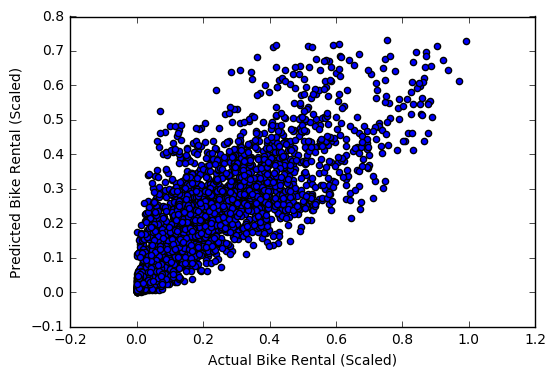

In [30]:
plt.scatter(test_y_scale, pred_y_scaled_knn)
plt.xlabel('Actual Bike Rental (Scaled)')
plt.ylabel('Predicted Bike Rental (Scaled)')

It is clear from the plot that the predicted count is somewhat related to the actual count in the test dataset. But there are some errors.

We now compute some performance metrics.

In [31]:
# Calculate MAE
metrics.mean_absolute_error(test_y_scale, pred_y_scaled_knn)

0.074449827563439749

In [32]:
# Calculate R squared
metrics.r2_score(test_y_scale, pred_y_scaled_knn)

0.66581265539418255

In [33]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y_scale, pred_y_scaled_knn)

0.011832911272930806

In [34]:
# Calculate RMSE 

np.sqrt(((test_y_scale - pred_y_scaled_knn) ** 2).mean())['count']

0.10877918584421736

### 3.3. Train a Regression Decision Tree

In [35]:
np.arange(2,51)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [36]:
para_dt = {'min_samples_split':np.arange(2,51)}
para_dt

{'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [37]:
dt = tree.DecisionTreeRegressor()

In [38]:
grid_dt = model_selection.GridSearchCV(dt, para_dt)

In [39]:
grid_dt.fit(train_X,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
# Show best parameters
grid_dt.best_params_


{'min_samples_split': 49}

### 3.4. Evaluate Regression Tree

In [41]:
# Predict on test set
pred_y_dt = grid_dt.predict(test_X)

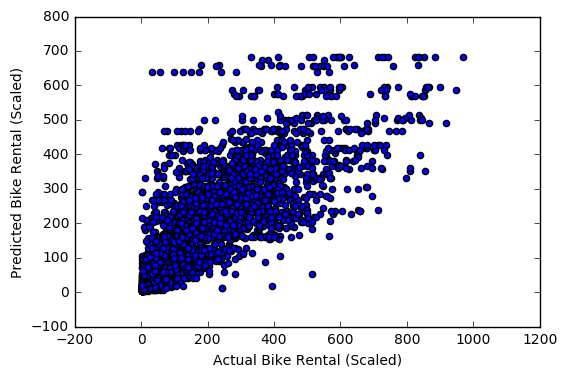

In [42]:
plt.scatter(test_y, pred_y_dt)
plt.xlabel('Actual Bike Rental (Scaled)')
plt.ylabel('Predicted Bike Rental (Scaled)')

Now, let's calculate some performance metrics.

In [43]:
# Calculate MAE
metrics.mean_absolute_error(test_y, pred_y_dt)

75.415524417770513

In [44]:
# Calculate R squared
metrics.r2_score(test_y, pred_y_dt)

0.62423832884863961

In [45]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y, pred_y_dt)

12674.000575941511

In [46]:
# Calculate RMSE 
np.sqrt(((test_y['count'] - pred_y_dt) ** 2).mean())

112.57886380640686

### 3.5. Train a Neural Network

In [47]:
para_ann = {'hidden_layer_sizes':[(300,),
                                  (250,),
                                  (200,),
                                  (150,),
                                  (100,),
                                  (50,),
                                  (50,10),
                                  (9,7,5,3)]}
para_ann

{'hidden_layer_sizes': [(300,),
  (250,),
  (200,),
  (150,),
  (100,),
  (50,),
  (50, 10),
  (9, 7, 5, 3)]}

In [48]:
ann = neural_network.MLPRegressor()

In [49]:
grid_ann = model_selection.GridSearchCV(ann, para_ann)

In [50]:
grid_ann.fit(train_X_scale,train_y_scale['count'])

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(300,), (250,), (200,), (150,), (100,), (50,), (50, 10), (9, 7, 5, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
# Show best parameters
grid_ann.best_params_


{'hidden_layer_sizes': (250,)}

### 3.6. Evaluate Neural Network

In [52]:
# Predict on test set
pred_y_scaled_ann = grid_ann.predict(test_X_scale)

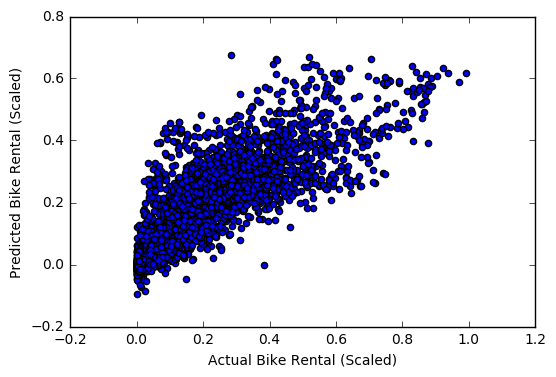

In [53]:
plt.scatter(test_y_scale, pred_y_scaled_ann)
plt.xlabel('Actual Bike Rental (Scaled)')
plt.ylabel('Predicted Bike Rental (Scaled)')

Now, let's calculate some performance metrics.

In [54]:
# Calculate MAE
metrics.mean_absolute_error(test_y_scale, pred_y_scaled_ann)

0.072645818340866045

In [55]:
# Calculate R squared
metrics.r2_score(test_y_scale, pred_y_scaled_ann)

0.67098247431030411

In [56]:
# Calculate MSE
metrics.regression.mean_squared_error(test_y_scale, pred_y_scaled_ann)

0.011649858235408565

In [57]:
# Calculate RMSE 
np.sqrt(((test_y_scale['count'] - pred_y_scaled_ann) ** 2).mean())

0.10793450901082827

### 3.7. Compare Three Models

In [58]:
para = [grid_knn.best_params_,grid_dt.best_params_,grid_ann.best_params_]

mae = [metrics.mean_absolute_error(test_y_scale, pred_y_scaled_knn),
       metrics.mean_absolute_error(test_y, pred_y_dt),
       metrics.mean_absolute_error(test_y_scale, pred_y_scaled_ann)]

r2 = [metrics.r2_score(test_y_scale, pred_y_scaled_knn),
      metrics.r2_score(test_y, pred_y_dt),
      metrics.r2_score(test_y_scale, pred_y_scaled_ann)]

mse = [metrics.regression.mean_squared_error(test_y_scale, pred_y_scaled_knn),
       metrics.regression.mean_squared_error(test_y, pred_y_dt),
       metrics.regression.mean_squared_error(test_y_scale, pred_y_scaled_ann)]

rmse =[np.sqrt(((test_y_scale - pred_y_scaled_knn) ** 2).mean())['count'],
      np.sqrt(((test_y['count'] - pred_y_dt) ** 2).mean()),
      np.sqrt(((test_y_scale['count'] - pred_y_scaled_ann) ** 2).mean())] 

In [59]:
np.sqrt(((test_y['count'] - pred_y_dt) ** 2).mean())

112.57886380640686

In [60]:
pd.DataFrame({'Parameters':para,
              'MAE':mae, 'R2':r2, 
              'MSE':mse, 'RMSE':rmse},
            index = ['k-NN','Regression Tree','Neural Network'])

,MAE,MSE,Parameters,R2,RMSE
k-NN,0.074450,0.011833,{'n_neighbors': 13},0.665813,0.108779
Regression Tree,75.415524,12674.000576,{'min_samples_split': 49},0.624238,112.578864
Neural Network,0.072646,0.011650,"{'hidden_layer_sizes': (250,)}",0.670982,0.107935


From the above comparison, we can see that neural network model has a better performance than k-NN and regression tree.

Please notice that the predicted count of bike rental for k-NN and neural network is scaled. If we need the unscaled response prediction, we need to convert it back to the original scale. Since regression tree is tested on the unscaled data, the MAE, MSE, and RMSE for regression tree are much larger than those of the other two models. 